In [17]:
#import dependicies
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import geopandas as gpd
from matplotlib import pyplot as plt

# Get Data from NYS Open Data
1. Download retail food store data
2. Create a pandas frame
3. Filter the data to counties within NYC only
4. Remove duplicate business (if any) 

In [18]:
#import NYS Food License Data
grocery = pd.read_csv('Retail_Food_Stores.csv')
#Filter to stores in NYC only and drop duplicates based on business license#
grocery = grocery[grocery['County'].isin(['Queens','New York','Richmond','Kings','Bronx'])]
grocery = grocery.drop_duplicates(subset=['License Number'])
grocery.head()

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
1,Queens,756125,Store,JAC,7-ELEVEN INC,7-ELEVEN STORE #35026H,253-02,UNION TPKE.,NaN,NaN,GLEN OAKS,NY,11004,0,POINT (-73.71744 40.74408)
3,Richmond,756121,Store,JAC,LA ROCA FUERTE DELI & GROCERY COR,LA ROCA FUERTE DELI & G,570,MIDLAND AVE,NaN,NaN,STATEN ISLAND,NY,10306,0,POINT (-74.09327 40.5724)
4,Queens,756120,Store,JAC,JACKSONS DELI INC,MILLIE'S DELI,13-01,JACKSON AVE,NaN,NaN,LONG ISLAND CITY,NY,11101,0,POINT (-73.94959 40.74412)
5,Queens,756118,Store,JAC,PRODUCTOS MEXICANOS LA GUAD LLC,PRODUCTOS MEX LA GUDALU,92-24,CORONA AVE,NaN,NaN,ELMHURST,NY,11373,1100,POINT (-73.87145 40.74241)
8,New York,756114,Store,JAC,NY A&M 1990 CORP,NY A&M 1990,1187,1ST AVE,NaN,NaN,NEW YORK,NY,10065,0,POINT (-73.95954 40.76297)


In [19]:
len(grocery)

13630

# Data Cleaning
1. Filter data to remove non-fresh food stores (including deli's, candy stores, gas station marts and etc.)
2. Filter data based on store square footage (eliminate stores smaller than a threshold)
3. Keep the relevant columns 
4. Generate lat and long from geolocation

In [20]:
# since establishment type 'A' is store - no filtering possible with this field
grocery['Establishment Type'].unique()

array(['JAC', 'A', 'JABCH', 'JABC', 'JACK', 'JACH', 'JABCK', 'JAD', 'JAM',
       'JACDK', 'JACN', 'JADK', 'JACDH', 'JACDHK', 'JABCD', 'JACD', 'JAB',
       'JABH', 'JACI', 'JAO', 'JABK', 'JACR', 'JACE', 'JABCHK', 'JABCDH',
       'JACDEK', 'JACDE', 'JABHK', 'JADHK', 'JABCDK', 'JACHK', 'JACDEW',
       'JAK', 'JAEHK', 'JAZ', 'JADX'], dtype=object)

In [21]:
# see the distribution of store size (square footage)
grocery.describe()

,License Number,Address Line 2,Address Line 3,Zip Code,Square Footage
count,13630.000000,0.0,0.0,13630.000000,13630.000000
mean,702422.142406,NaN,NaN,10851.786207,2696.012693
std,52372.724973,NaN,NaN,523.129205,7954.258582
min,475040.000000,NaN,NaN,10001.000000,0.000000
25%,639151.000000,NaN,NaN,10453.000000,400.000000
50%,725378.500000,NaN,NaN,11207.000000,1200.000000
75%,744213.250000,NaN,NaN,11232.000000,2000.000000
max,756125.000000,NaN,NaN,11706.000000,230000.000000


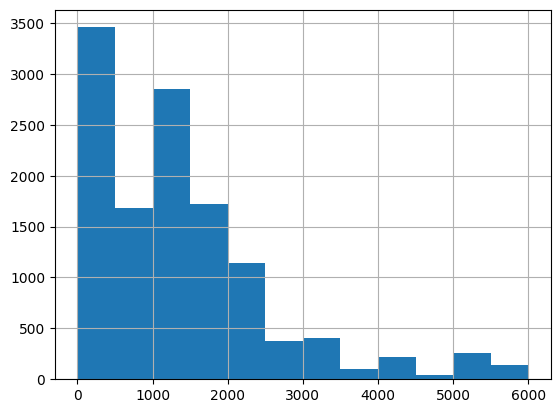

In [22]:
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
grocery['Square Footage'].hist(bins=bins, range=(-1, len(grocery['Square Footage'].unique())))
plt.show()


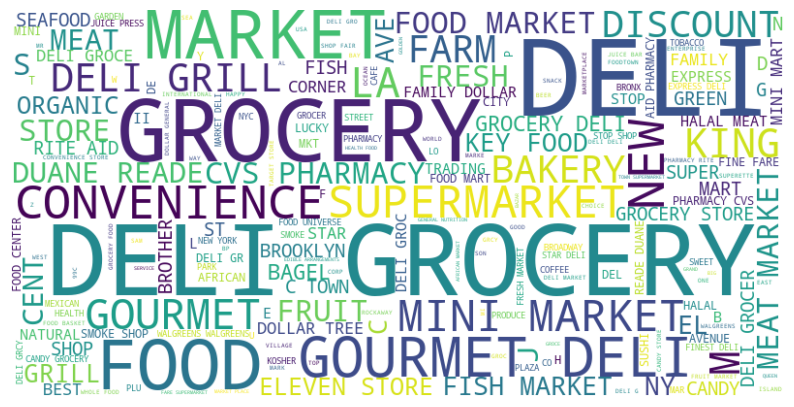

In [23]:
# generate a word cloud to see most common text strings for business names for filtering
from wordcloud import WordCloud
grocery['DBA Name'] = grocery['DBA Name'].astype(str)
business_names = ' '.join(grocery['DBA Name'])
wordcloud = WordCloud(background_color= 'white',width=800, height=400, random_state=1, max_font_size=110).generate(business_names)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [25]:
# create a text filter to remove non-fresh food stores 
substrings = ['DELI','7-ELEVEN','MART','DOLLAR','CVS','WALGREEN','RITE AID','CONVENIENCE','BODEGA','PHARMACY','CANDY','SUSHI','GRILL','EDIBLE ARRANGEMENTS','SMOKE','WALGREENS','BEVERAGE','DUANE READE','JUICE','TESOLIFE','GETIR','SUGAR','BAKERY','DESSERT','GOPUFF','MINI']
pattern = '|'.join(substrings)
grocery2 = grocery[~grocery['DBA Name'].str.contains(pattern, case=False)]
grocery3 = grocery2[~grocery2['Entity Name'].str.contains(pattern, case=False)]
grocery3

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
5,Queens,756118,Store,JAC,PRODUCTOS MEXICANOS LA GUAD LLC,PRODUCTOS MEX LA GUDALU,92-24,CORONA AVE,NaN,NaN,ELMHURST,NY,11373,1100,POINT (-73.87145 40.74241)
8,New York,756114,Store,JAC,NY A&M 1990 CORP,NY A&M 1990,1187,1ST AVE,NaN,NaN,NEW YORK,NY,10065,0,POINT (-73.95954 40.76297)
33,Queens,756083,Store,JAC,LABBAIK SUPERMARKET INC,LABBAIK SUPERMARKET,158-06,84TH DR,NaN,NaN,JAMAICA,NY,11432,1000,POINT (-73.80646 40.71309)
34,Queens,756082,Store,A,ANNY TRADING INC,ANNY TRADING,87-54,PARSONS BLVD,NaN,NaN,JAMAICA,NY,11432,1000,POINT (-73.80289 40.70793)
36,Kings,756080,Store,JAC,BROOKLYN NATURAL MARKET V CORP,BROOKLYN NATURAL MARKET,2126-8,CATON AVE,NaN,NaN,BROOKLYN,NY,11226,2500,POINT (-73.95974 40.65281)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21992,Bronx,600155,Store,JAC,C&G ESPINOSA FOOD INC,C&G ESPINOSA,794,COURTLANDT AVE,NaN,NaN,BRONX,NY,10451,1500,POINT (-73.91666 40.82268)
21993,Bronx,600103,Store,JAC,SILJKOVIC RABA&VEZIRA,SCALINADA MEAT GROC&DEL,667,E 187TH ST,NaN,NaN,BRONX,NY,10458,800,POINT (-73.88565 40.85461)
21994,Bronx,600057,Store,JABCHK,S&S CHEESECAKE INC,S&S CHEESECAKE,222,W 238TH ST,NaN,NaN,BRONX,NY,10463,4000,POINT (-73.8997 40.88481)
21995,Bronx,600049,Store,JAC,NANIN FOOD CORP,C TOWN,2733,3RD AVE,NaN,NaN,BRONX,NY,10451,10000,POINT (-73.9211 40.81425)


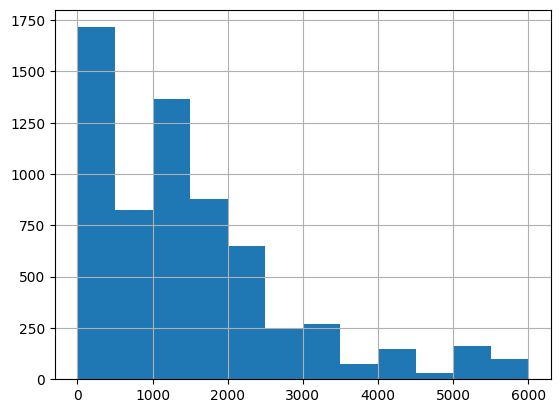

In [26]:
# we can use store size now to eliminate small stores (not zero)
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
grocery3['Square Footage'].hist(bins=bins, range=(-1, len(grocery3['Square Footage'].unique())))
plt.show()

In [27]:
# remove stores with less than 5,000 square feet - keep zero values since they are unknown
grocery3 = grocery3[(grocery3['Square Footage'] == 0) | (grocery3['Square Footage'] >= 5000)]
grocery3

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
8,New York,756114,Store,JAC,NY A&M 1990 CORP,NY A&M 1990,1187,1ST AVE,NaN,NaN,NEW YORK,NY,10065,0,POINT (-73.95954 40.76297)
46,Kings,756059,Store,JAC,RAHMA GROCERY INC,RAHMA GROCERY,1325,FOSTER AVE,NaN,NaN,BROOKLYN,NY,11230,0,POINT (-73.96402 40.63362)
47,Queens,756058,Store,A,CHAPARRITA GROCERY INC,CHAPARRITA GROCERY,7412,METROPOLITAN AVE,NaN,NaN,MIDDLE VILLAGE,NY,11379,0,POINT (-73.87789 40.71287)
59,New York,756032,Store,JAC,ITO INC,TIKKA,66,BROADWAY,NaN,NaN,NEW YORK,NY,10005,0,POINT (-74.01228 40.70706)
61,Kings,756028,Store,JAC,CHICKEN MEAT CORP,AMERICA'S FOOD BASKET,1380,ROCKAWAY PARKWAY,NaN,NaN,BROOKLYN,NY,11236,0,POINT (-73.9034 40.64613)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21972,Bronx,600770,Store,JABC,C & CBROTHERS OF NY,FINE FARE,59,E 167TH ST,NaN,NaN,BRONX,NY,10452,20000,POINT (-73.92058 40.83552)
21975,Bronx,600709,Store,JAC,AJC FOOD MARKET CORP,FOOD TOWN,4332,WHITE PLAINS RD,NaN,NaN,BRONX,NY,10466,24000,POINT (-73.85572 40.89638)
21982,Bronx,600437,Store,JABC,RED&WHITE MARKETS INC,MORTON WILLIAMS SPRMRKT,15,E KINGSBRIDGE RD,NaN,NaN,BRONX,NY,10468,25000,POINT (-73.89675 40.86721)
21989,Bronx,600246,Store,JABC,564 GROCERY INC,C TOWN,564,SOUTHERN BLVD,NaN,NaN,BRONX,NY,10455,8000,POINT (-73.90281 40.81251)


In [28]:
# check most frequent stores to make sure filters worked
grocery_freq = grocery3['DBA Name'].value_counts()
grocery_freq = grocery_freq.reset_index()
grocery_freq[:30]

,DBA Name,count
0,C TOWN,41
1,KEY FOOD,39
2,FINE FARE SUPERMARKET,23
3,IDEAL FOOD BASKET,19
4,BRAVO SUPERMARKET,18
5,FOOD UNIVERSE,17
6,FOOD BAZAAR,17
7,C TOWN SUPERMARKET,15
8,FINE FARE,15
9,SHOP FAIR,14


In [29]:
grocery3.dtypes

County                 object
License Number          int64
Operation Type         object
Establishment Type     object
Entity Name            object
DBA Name               object
Street Number          object
Street Name            object
Address Line 2        float64
Address Line 3        float64
City                   object
State                  object
Zip Code                int64
Square Footage          int64
Georeference           object
dtype: object

In [30]:
# Add Lat and Long (Coordinates)
grocery3['Georeference'] = grocery['Georeference'].astype(str)
grocery3['Georeference'] = grocery3['Georeference'].str.replace('POINT ', '')
grocery3['Georeference'] = grocery3['Georeference'].str.replace('(', '')
grocery3['Georeference'] = grocery3['Georeference'].str.replace(')', '')
grocery3[['longitude', 'latitude']] = grocery3['Georeference'].str.split(' ', expand=True)
#grocery3['Georeference'] = pd.to_numeric(grocery3['Georeference'])
grocery3 

C:\Users\Monty\AppData\Local\Temp\ipykernel_8644\3451162770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery3['Georeference'] = grocery['Georeference'].astype(str)
C:\Users\Monty\AppData\Local\Temp\ipykernel_8644\3451162770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery3['Georeference'] = grocery3['Georeference'].str.replace('POINT ', '')
C:\Users\Monty\AppData\Local\Temp\ipykernel_8644\3451162770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference,longitude,latitude
8,New York,756114,Store,JAC,NY A&M 1990 CORP,NY A&M 1990,1187,1ST AVE,NaN,NaN,NEW YORK,NY,10065,0,-73.95954 40.76297,-73.95954,40.76297
46,Kings,756059,Store,JAC,RAHMA GROCERY INC,RAHMA GROCERY,1325,FOSTER AVE,NaN,NaN,BROOKLYN,NY,11230,0,-73.96402 40.63362,-73.96402,40.63362
47,Queens,756058,Store,A,CHAPARRITA GROCERY INC,CHAPARRITA GROCERY,7412,METROPOLITAN AVE,NaN,NaN,MIDDLE VILLAGE,NY,11379,0,-73.87789 40.71287,-73.87789,40.71287
59,New York,756032,Store,JAC,ITO INC,TIKKA,66,BROADWAY,NaN,NaN,NEW YORK,NY,10005,0,-74.01228 40.70706,-74.01228,40.70706
61,Kings,756028,Store,JAC,CHICKEN MEAT CORP,AMERICA'S FOOD BASKET,1380,ROCKAWAY PARKWAY,NaN,NaN,BROOKLYN,NY,11236,0,-73.9034 40.64613,-73.9034,40.64613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21972,Bronx,600770,Store,JABC,C & CBROTHERS OF NY,FINE FARE,59,E 167TH ST,NaN,NaN,BRONX,NY,10452,20000,-73.92058 40.83552,-73.92058,40.83552
21975,Bronx,600709,Store,JAC,AJC FOOD MARKET CORP,FOOD TOWN,4332,WHITE PLAINS RD,NaN,NaN,BRONX,NY,10466,24000,-73.85572 40.89638,-73.85572,40.89638
21982,Bronx,600437,Store,JABC,RED&WHITE MARKETS INC,MORTON WILLIAMS SPRMRKT,15,E KINGSBRIDGE RD,NaN,NaN,BRONX,NY,10468,25000,-73.89675 40.86721,-73.89675,40.86721
21989,Bronx,600246,Store,JABC,564 GROCERY INC,C TOWN,564,SOUTHERN BLVD,NaN,NaN,BRONX,NY,10455,8000,-73.90281 40.81251,-73.90281,40.81251


C:\Users\Monty\AppData\Local\Temp\ipykernel_8644\1346786640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery3['latitude'] = pd.to_numeric(grocery3['latitude'], errors='coerce')
C:\Users\Monty\AppData\Local\Temp\ipykernel_8644\1346786640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery3['longitude'] = pd.to_numeric(grocery3['longitude'], errors='coerce')


<Axes: xlabel='longitude', ylabel='latitude'>

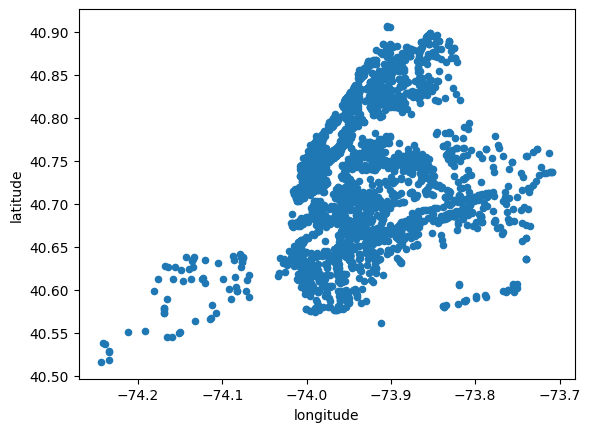

In [31]:

grocery3['latitude'] = pd.to_numeric(grocery3['latitude'], errors='coerce')
grocery3['longitude'] = pd.to_numeric(grocery3['longitude'], errors='coerce')

grocery3.plot(x="longitude", y="latitude", kind="scatter")

In [32]:
grocery3.to_csv('grocery.csv', index=False)